# Import Data

In [ ]:
# needs to be run only once
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# fetch dataset
cardiotocography = fetch_ucirepo(id=193)

# data (as pandas dataframes)
X = cardiotocography.data.features
y = cardiotocography.data.targets

# metadata
print(cardiotocography.metadata)

# variable information
cardiotocography.variables

{'uci_id': 193, 'name': 'Cardiotocography', 'repository_url': 'https://archive.ics.uci.edu/dataset/193/cardiotocography', 'data_url': 'https://archive.ics.uci.edu/static/public/193/data.csv', 'abstract': 'The dataset consists of measurements of fetal heart rate (FHR) and uterine contraction (UC) features on cardiotocograms classified by expert obstetricians.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 2126, 'num_features': 21, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['CLASS', 'NSP'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2000, 'last_updated': 'Fri Mar 15 2024', 'dataset_doi': '10.24432/C51S4N', 'creators': ['D. Campos', 'J. Bernardes'], 'intro_paper': None, 'additional_info': {'summary': '2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified

,name,role,type,demographic,description,units,missing_values
0,LB,Feature,Integer,None,None,None,no
1,AC,Feature,Continuous,None,None,None,no
2,FM,Feature,Continuous,None,None,None,no
3,UC,Feature,Continuous,None,None,None,no
4,DL,Feature,Continuous,None,None,None,no
5,DS,Feature,Continuous,None,None,None,no
6,DP,Feature,Continuous,None,None,None,no
7,ASTV,Feature,Integer,None,None,None,no
8,MSTV,Feature,Continuous,None,None,None,no
9,ALTV,Feature,Integer,None,None,None,no


# Visualize Data

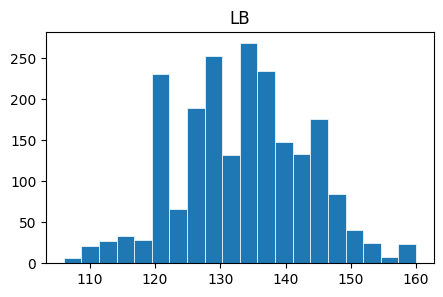

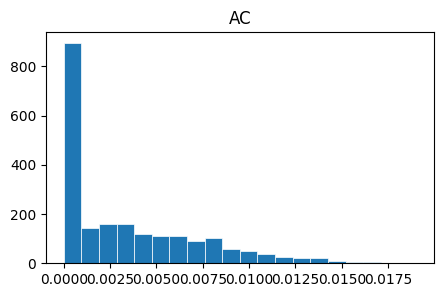

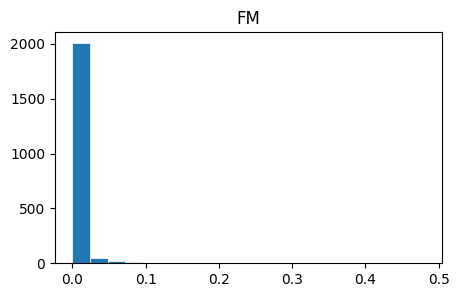

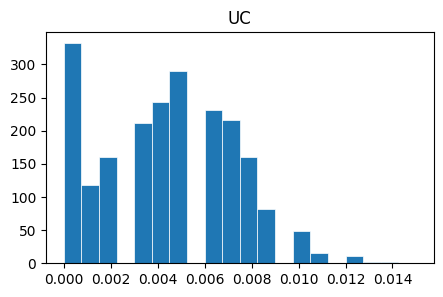

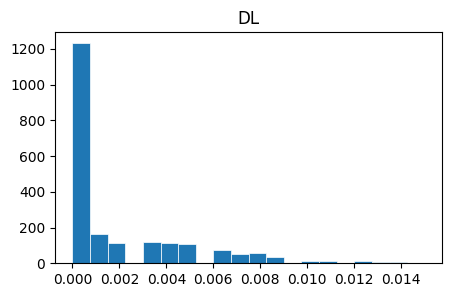

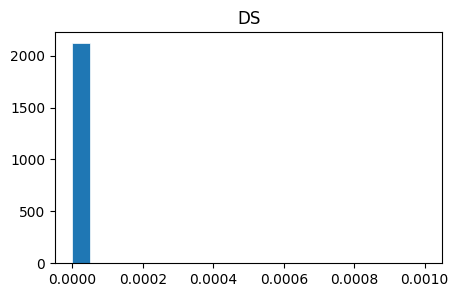

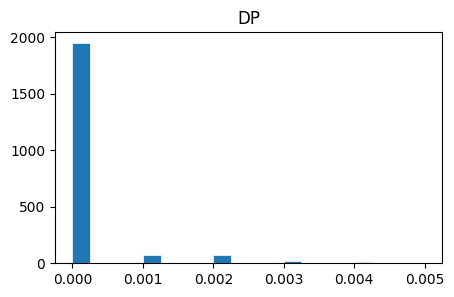

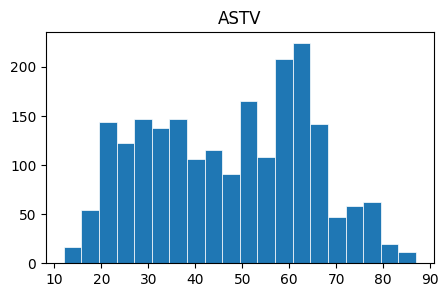

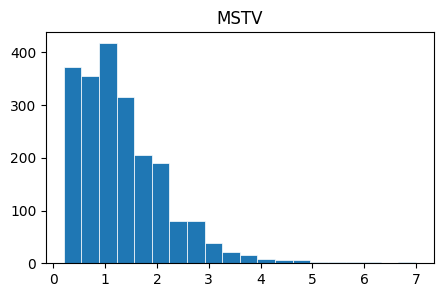

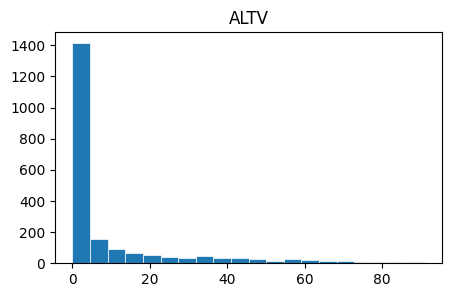

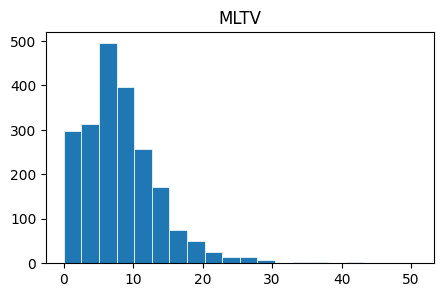

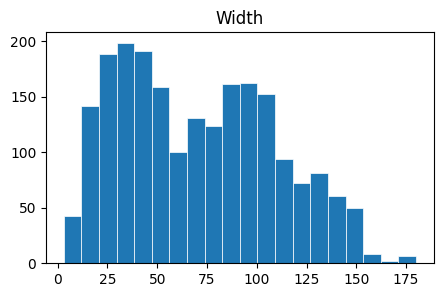

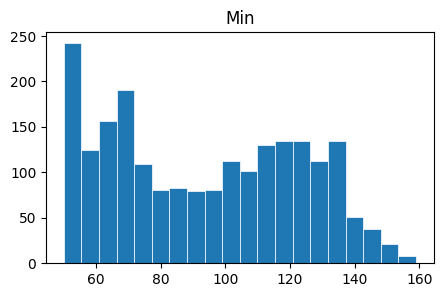

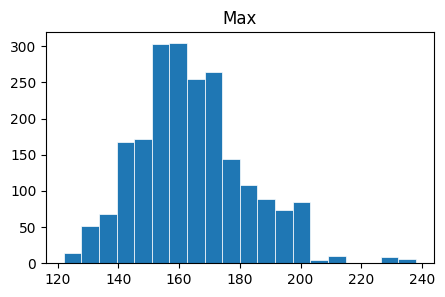

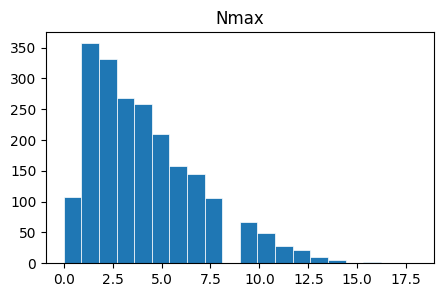

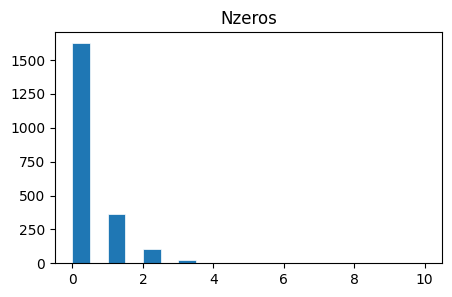

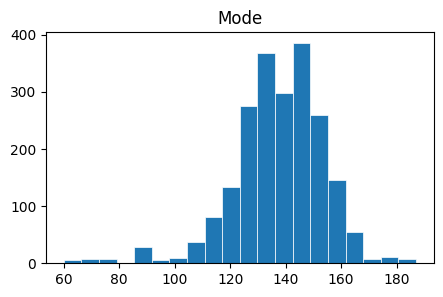

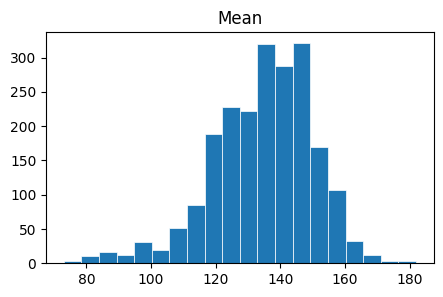

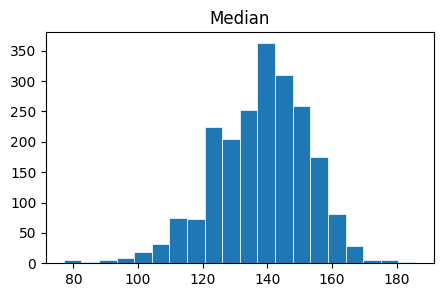

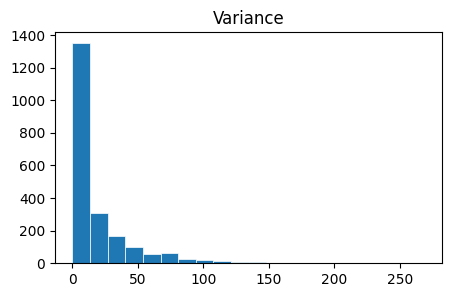

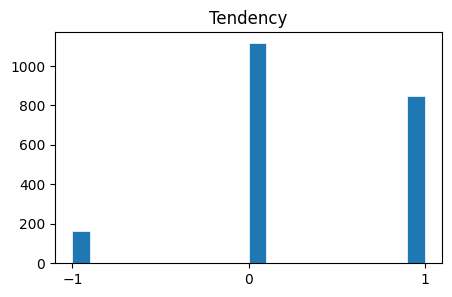

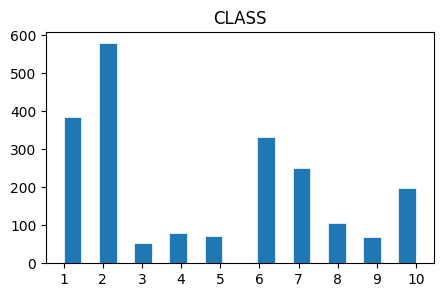

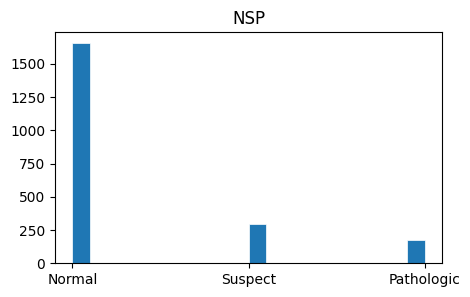

In [ ]:
columns = cardiotocography.variables['name']

for column in columns:
  fig, ax = plt.subplots()
  fig.set_size_inches(5, 3)

  if column not in ['NSP', 'CLASS']:
    data = cardiotocography.data.features[column]
  else:
    data = cardiotocography.data.targets[column]

  ax.hist(data, bins=20, linewidth=0.5, edgecolor="white")
  if column == 'NSP':
    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels(['Normal', 'Suspect', 'Pathologic'])
  elif column == 'CLASS':
    ax.set_xticks(np.arange(1, 11))
  elif column == 'Tendency':
    ax.set_xticks(np.arange(-1, 2))

  ax.set_title(column)

  plt.show()

  # If needed, create each plot one-by-one instead of with a loop

In [ ]:
cardiotocography.data.features['DS'].min()

0.0

In [ ]:
cardiotocography.data.features['DS'].max()

0.001

## Observation

Regarding Classes and NSP:

Each class describe a certain pattern measured by the CTG. Most cases in a certain class usually share the same NSP verdict, with several exceptions, as follows:

1. Calm sleep: Majority N, two cases of S
2. REM sleep: All is N
3. Calm vigilance: All is N
4. Active vigilance: All is N
5. Shift pattern (A or Susp with shifts): Majority S, three cases of N.
6. Accelerative/decelerative pattern (stress situation): Majority N, two cases of S.
7. Decelerative pattern (vagal stimulation): 227 to 25 ratio of N and S, respectively.
8. Largely decelerative pattern: All is P
9. Flat-sinusoidal pattern (pathological state): Majority P, one case of S.
10. Suspect pattern: Majority S, one case of P.

Only class 7 exhibits a significant higher mix of NSP verdict, with the minority occupying 10% of the cases. Every other case only have zero to three outliers.

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, f1_score

X = cardiotocography.data.features.copy()
y_nsp = cardiotocography.data.targets["NSP"].copy()   # 3-class label
y_class = cardiotocography.data.targets["CLASS"].copy()  # 10-class label

print("NSP counts:\n", y_nsp.value_counts())
print("\nCLASS counts:\n", y_class.value_counts())

# 3. Train/test split (for NSP)
X_train_nsp, X_test_nsp, y_train_nsp, y_test_nsp = train_test_split(
    X, y_nsp, test_size=0.2, stratify=y_nsp)

# 4. Train/test split (for CLASS)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X, y_class, test_size=0.2, stratify=y_class)

# 5. Decision Tree for NSP
dt_nsp = DecisionTreeClassifier(class_weight="balanced", min_samples_leaf=20)
dt_nsp.fit(X_train_nsp, y_train_nsp)
y_pred_nsp = dt_nsp.predict(X_test_nsp)

print("\n--- NSP (3-class) ---")
print("Balanced Accuracy:", balanced_accuracy_score(y_test_nsp, y_pred_nsp))
print("Macro F1:", f1_score(y_test_nsp, y_pred_nsp, average="macro"))
print(classification_report(y_test_nsp, y_pred_nsp, target_names=["Normal","Suspect","Pathologic"]))

# 6. Decision Tree for CLASS
dt_class = DecisionTreeClassifier(class_weight="balanced", min_samples_leaf=5)
dt_class.fit(X_train_class, y_train_class)
y_pred_class = dt_class.predict(X_test_class)

print("\n--- CLASS (10-class) ---")
print("Balanced Accuracy:", balanced_accuracy_score(y_test_class, y_pred_class))
print("Macro F1:", f1_score(y_test_class, y_pred_class, average="macro"))
print(classification_report(y_test_class, y_pred_class))


NSP counts:
 NSP
1    1655
2     295
3     176
Name: count, dtype: int64

CLASS counts:
 CLASS
2     579
1     384
6     332
7     252
10    197
8     107
4      81
5      72
9      69
3      53
Name: count, dtype: int64

--- NSP (3-class) ---
Balanced Accuracy: 0.8912035551406595
Macro F1: 0.8020319953269142
              precision    recall  f1-score   support

      Normal       0.98      0.85      0.91       332
     Suspect       0.58      0.88      0.70        59
  Pathologic       0.69      0.94      0.80        35

    accuracy                           0.86       426
   macro avg       0.75      0.89      0.80       426
weighted avg       0.90      0.86      0.87       426


--- CLASS (10-class) ---
Balanced Accuracy: 0.8065500262455396
Macro F1: 0.7724089420090192
              precision    recall  f1-score   support

           1       0.82      0.77      0.79        77
           2       0.94      0.72      0.81       116
           3       1.00      0.55      0.71        1

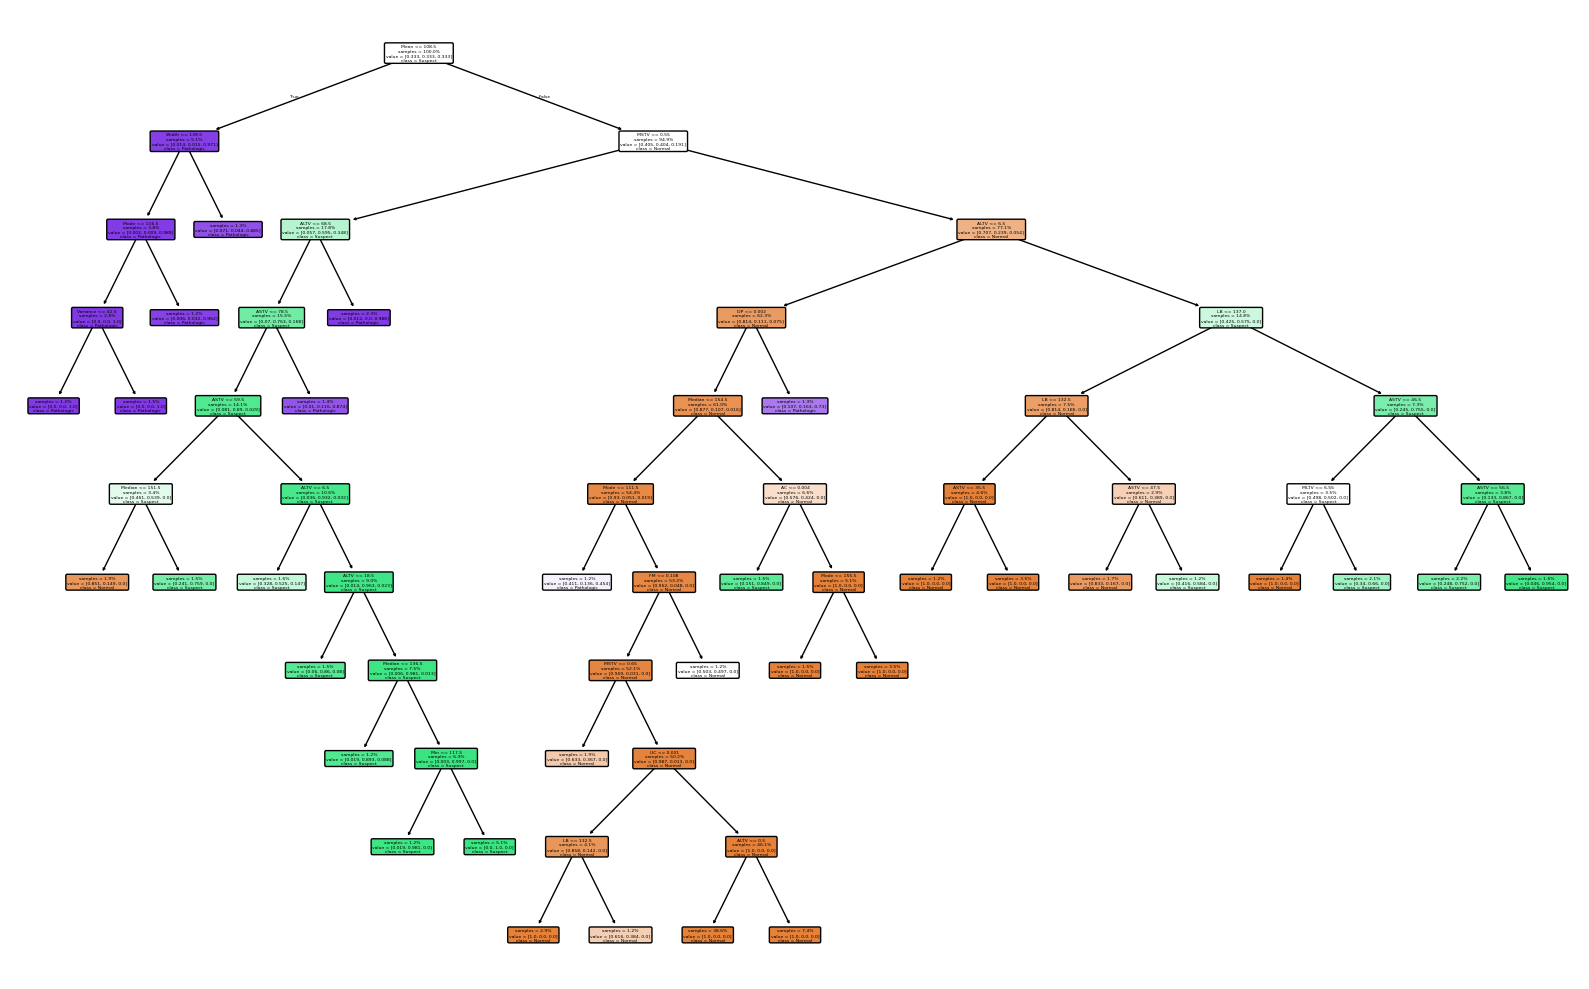

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 10))
plot_tree(
    dt_nsp,                        # trained tree (e.g., dt_nsp or dt_cls)
    feature_names=X.columns,       # pandas column names
    class_names=["Normal","Suspect","Pathologic"],
    filled=True, rounded=True,
    impurity=False, proportion=True
)
plt.tight_layout()
plt.show()

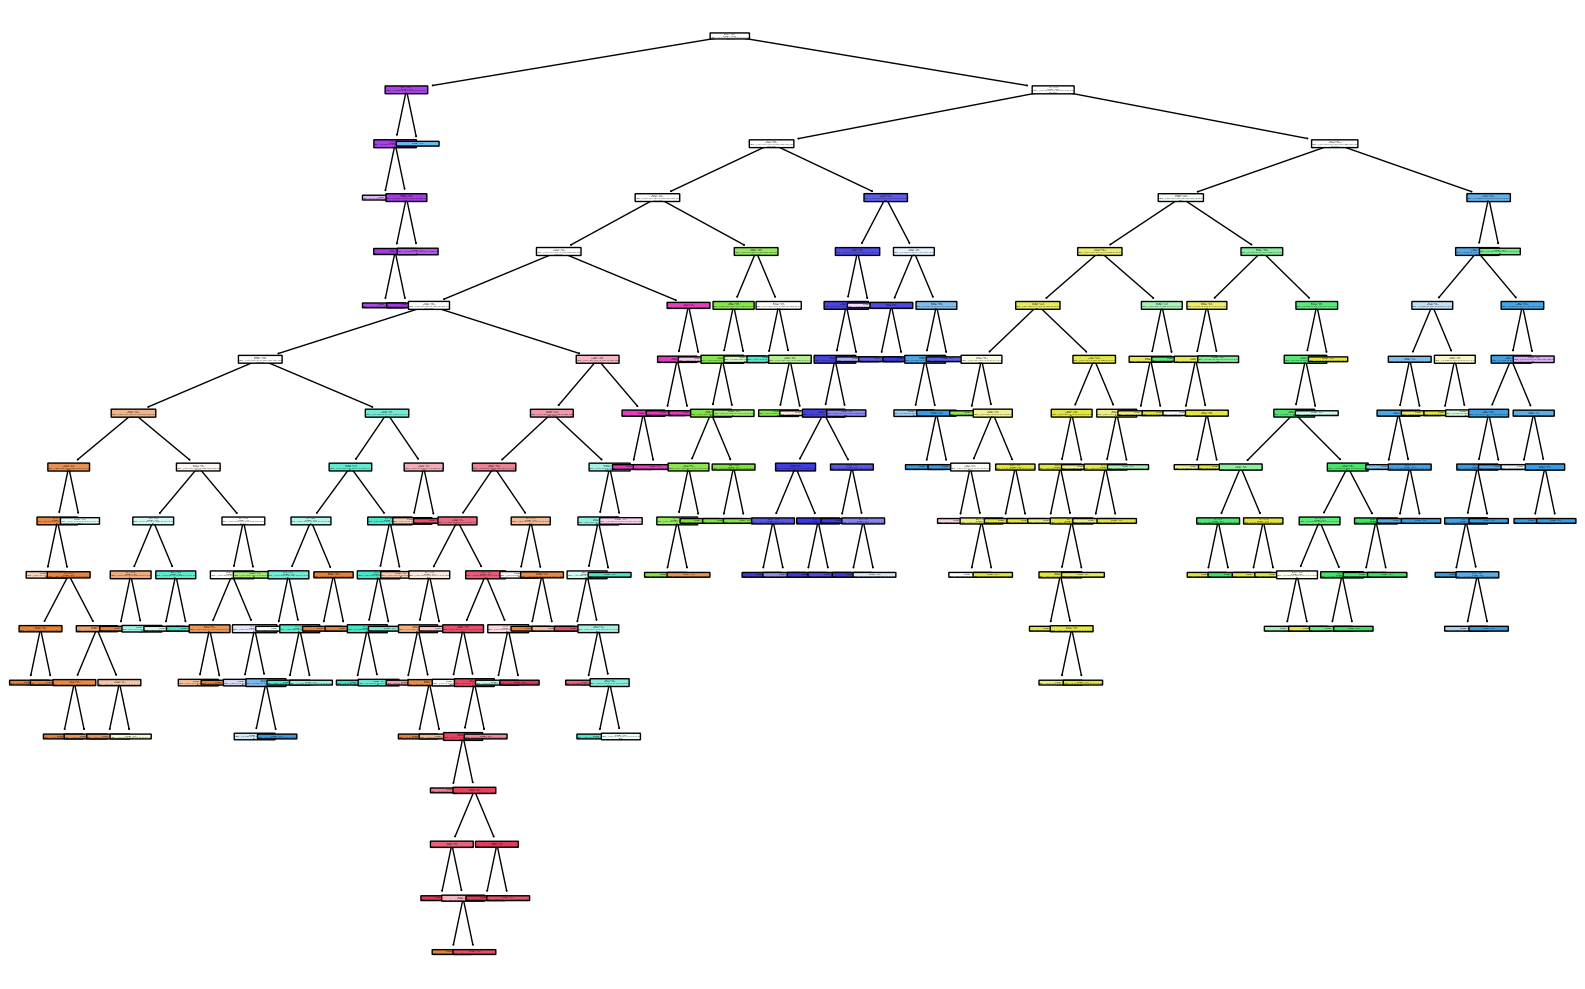

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 10))
plot_tree(
    dt_class,
    feature_names=X.columns,       # pandas column names
    class_names=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
    filled=True, rounded=True,
    impurity=False, proportion=True
)
plt.tight_layout()
plt.show()